In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data =pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [5]:
data.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [6]:
data.dtypes.value_counts()

int64     26
object     9
Name: count, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

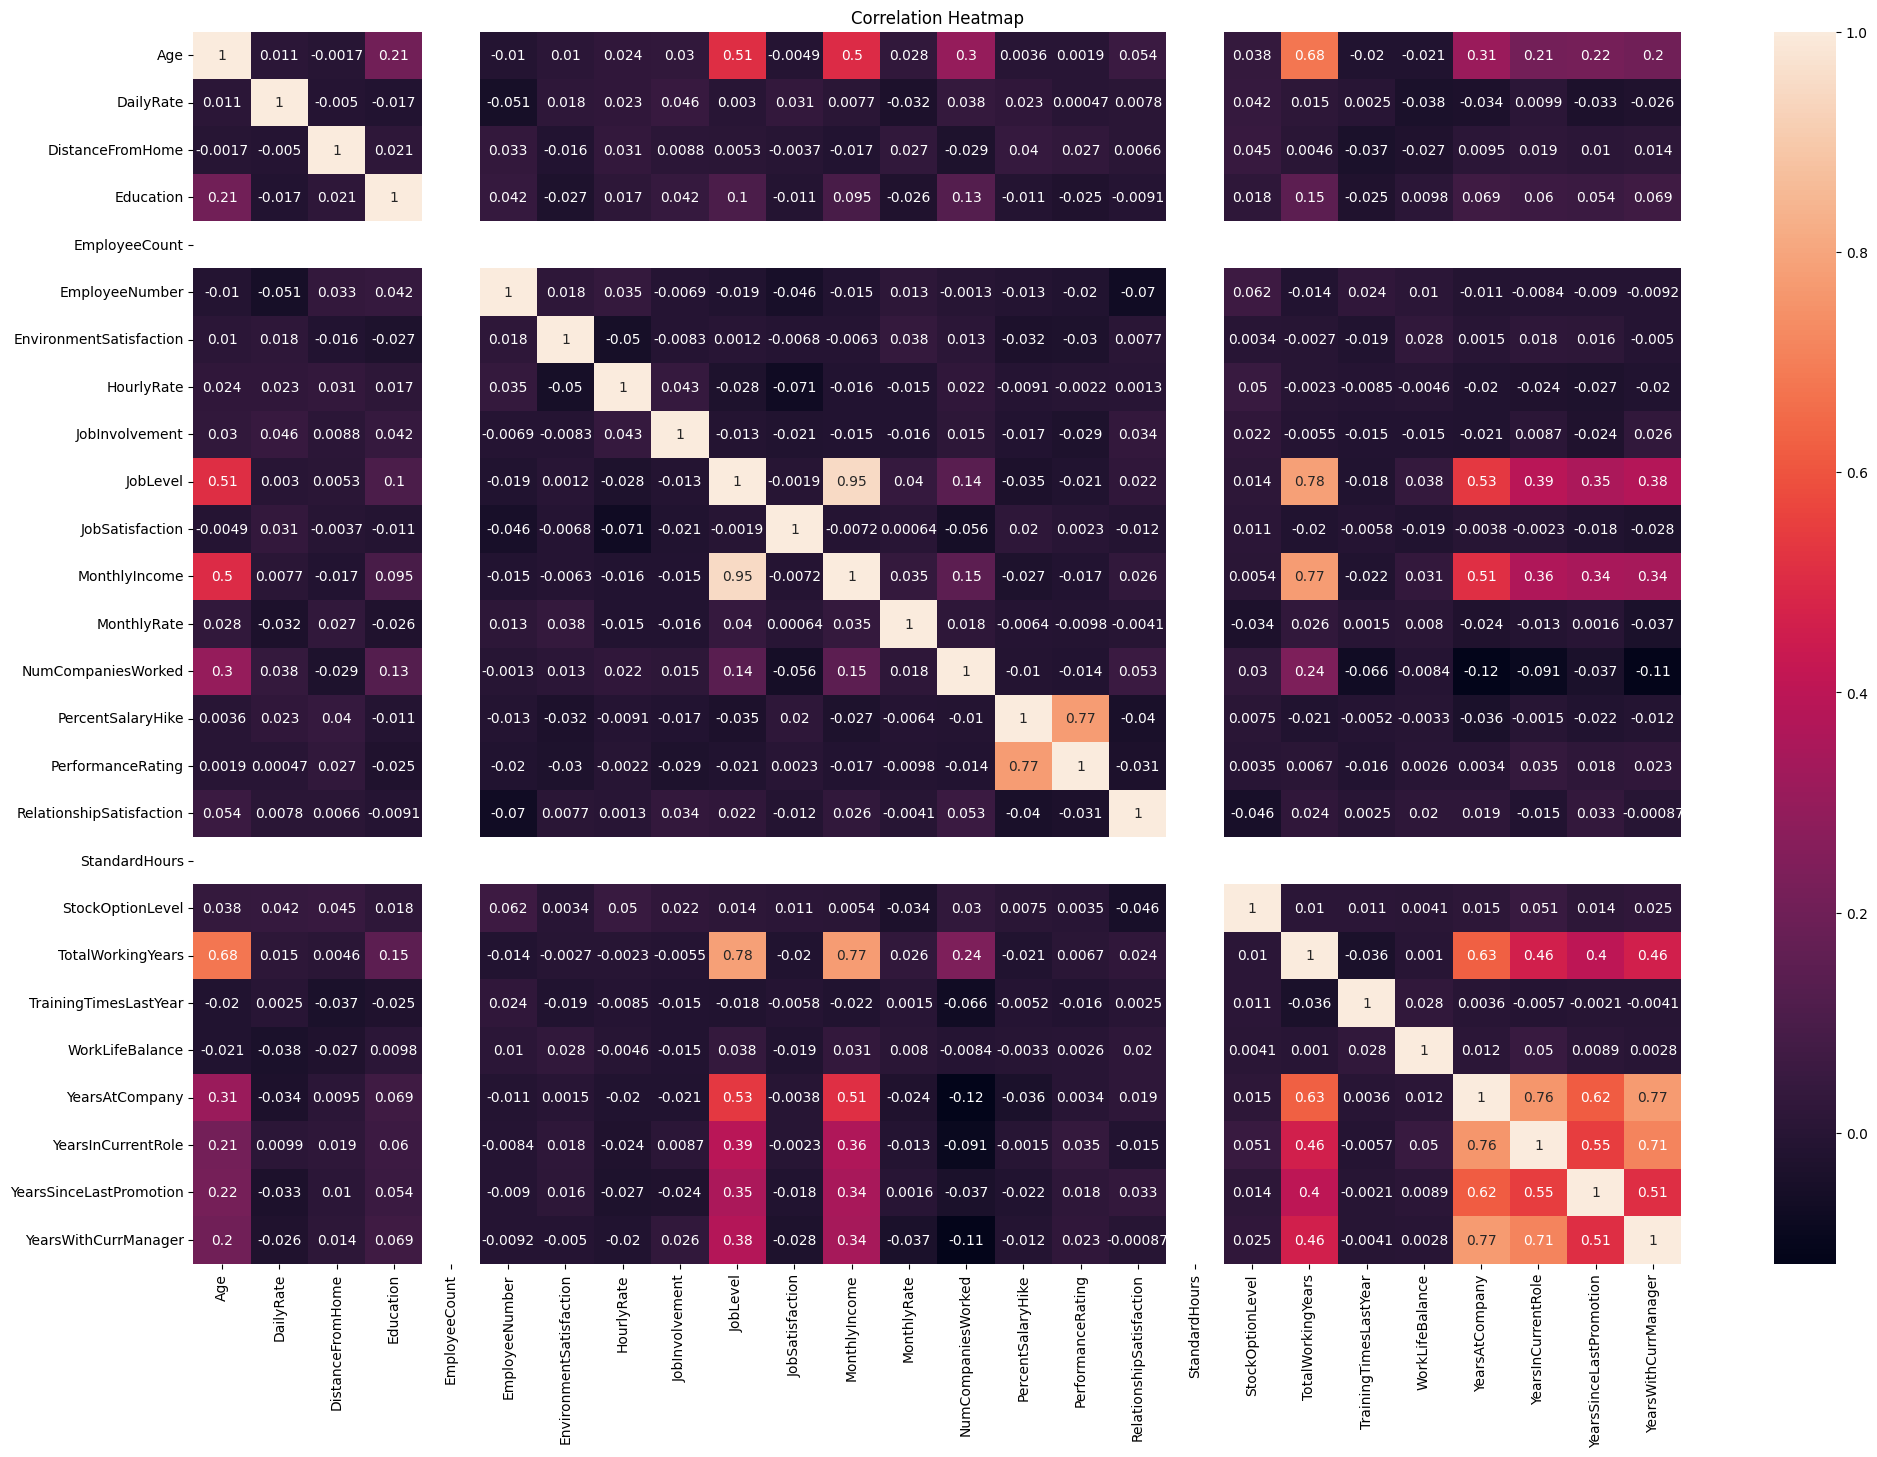

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=[ 'int64'])

correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_encoded = data.copy()

# Apply label encoding to categorical columns
categorical_columns = data_encoded.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data_encoded[col] = encoder.fit_transform(data_encoded[col])
data_encoded
data_filled = data_encoded.fillna(0)

In [10]:
data_filled

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


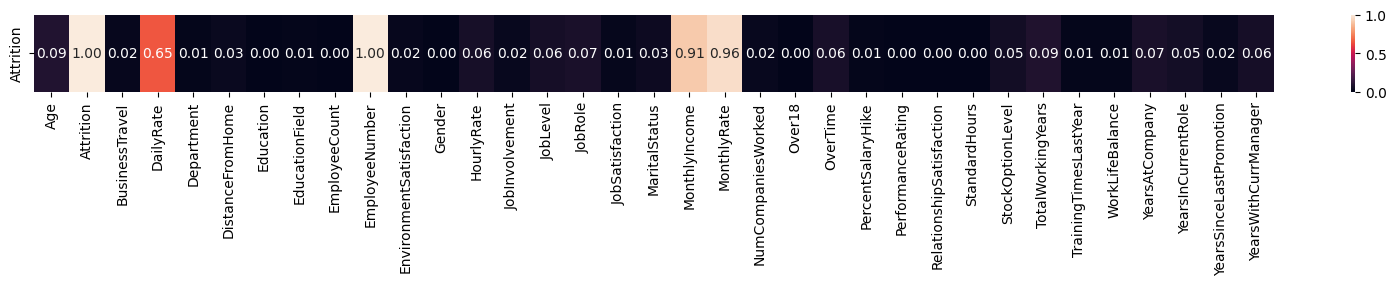

In [11]:
import math
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def conditional_entropy(x, y):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy)
    return entropy

def theil_u(x, y):
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values()))
    s_x = -sum([px * np.log(px) for px in p_x])
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

df=data_filled

theilu = pd.DataFrame(index=['Attrition'])
columns = df.columns
for j in range(0, len(columns)):
    u = theil_u(df['Attrition'].tolist(), df[columns[j]].tolist())
    theilu.loc[:, columns[j]] = u

theilu.fillna(value=np.nan, inplace=True)

plt.figure(figsize=(20, 1))
sns.heatmap(theilu, annot=True, fmt='.2f')
plt.show()

In [12]:
X= data_filled.drop('Attrition',axis=1)
Y=data_filled['Attrition']

In [13]:
X


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [14]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [16]:
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_train)
X_Test =  scaler.transform(X_test)

In [17]:
import numpy as np
Y_Train = np.array(Y_train)
Y_Test = np.array(Y_test)

In [18]:
count_of_ones = np.count_nonzero(Y)
count_of_zeros = len(Y) - count_of_ones
print("Count of ones:", count_of_ones)
print("Count of zeros:", count_of_zeros)


Count of ones: 237
Count of zeros: 1233


In [19]:
Y_train

714     0
135     0
1271    1
477     0
806     0
       ..
1130    0
1294    0
860     1
1459    0
1126    0
Name: Attrition, Length: 1029, dtype: int64

In [20]:
X_Train

array([[ 1.41369115,  0.59277912,  0.79421172, ..., -0.05899761,
        -0.36030992, -0.28567748],
       [-0.09834647,  0.59277912, -1.44072151, ..., -0.60592139,
        -0.68214924, -0.85372023],
       [-1.71838678,  0.59277912, -1.14354907, ..., -1.15284518,
        -0.36030992, -1.13774161],
       ...,
       [-1.61038409, -0.92079337,  1.11348789, ..., -1.15284518,
        -0.68214924, -1.13774161],
       [-0.85436528,  0.59277912,  1.41311631, ..., -0.3324595 ,
        -0.68214924, -0.28567748],
       [ 1.41369115,  0.59277912, -1.32283492, ..., -1.15284518,
        -0.68214924, -1.13774161]])

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_Train, Y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(X_Test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8662131519274376

In [24]:
from sklearn.linear_model import LogisticRegressionCV

# L2 regularized logistic regression

lr_l2 = LogisticRegressionCV(Cs = 10, cv= 4, penalty= 'l2', solver= 'newton-cg', max_iter = 100)
lr_l2.fit(X_Train, Y_train)

LogisticRegressionCV(cv=4, solver='newton-cg')

In [25]:
y_pred1 = lr_l2.predict(X_Test)
accuracy_score(Y_test,y_pred1)

0.8662131519274376

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [43]:
from sklearn.svm import SVC
svm_classifier1 = SVC(kernel='rbf', random_state=42)
svm_classifier1.fit(X_Train, Y_train)

# Make predictions on the testing data
Y_pred2 = svm_classifier1.predict(X_Test)

# Evaluate the model's performance
accuracy2 = accuracy_score(Y_pred2,Y_test)
f1_2=f1_score(Y_pred2,Y_test)
precision2 = precision_score(Y_pred2,Y_test)
recall2 = recall_score(Y_pred2,Y_test)
auc2= roc_auc_score(Y_pred2,Y_test)
print("Accuracy:", accuracy2)
print("F1-score:", f1_2)
print("Precision:", precision2)
print("Recall:", recall2)
print("AUC:", auc2)

Accuracy: 0.8752834467120182
F1-score: 0.20289855072463767
Precision: 0.11475409836065574
Recall: 0.875
AUC: 0.8751443418013857


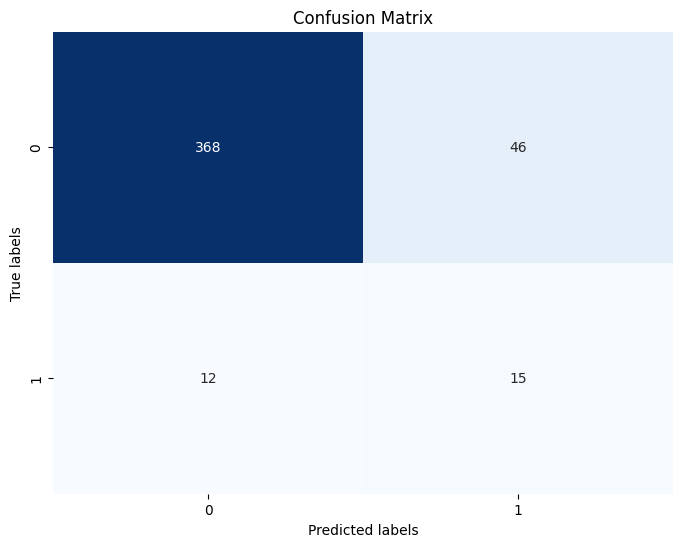

In [28]:
from sklearn.metrics import confusion_matrix
true_labels = np.array(Y_pred2)
predicted_labels = np.array(Y_Test)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

I noticed that the data is over sampled for one class.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


# I am applying  SMOTE (Synthetic Minority Over-sampling Technique) for over-sampling
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_Train, Y_Train)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, Y_train_resampled)


y_pred4 = rf_classifier.predict(X_test)


print("Classification Report:")
print(classification_report(Y_Test, y_pred4))


count_of_ones_resampled = np.count_nonzero(Y_train_resampled)
count_of_zeros_resampled = len(Y_train_resampled) - count_of_ones_resampled
print("Count of ones (after resampling):", count_of_ones_resampled)
print("Count of zeros (after resampling):", count_of_zeros_resampled)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       380
           1       0.10      0.02      0.03        61

    accuracy                           0.84       441
   macro avg       0.48      0.50      0.47       441
weighted avg       0.76      0.84      0.79       441

Count of ones (after resampling): 853
Count of zeros (after resampling): 853


In [38]:
from sklearn.svm import SVC

# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_resampled, Y_train_resampled)
y_pred_svm_rbf = svm_rbf.predict(X_Test)


# Print results for SVM with RBF kernel

print("Classification Report:")
print(classification_report(Y_Test, y_pred_svm_rbf))
print("Count of ones (after resampling):", count_of_ones_resampled)
print("Count of zeros (after resampling):", count_of_zeros_resampled)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       380
           1       0.42      0.36      0.39        61

    accuracy                           0.84       441
   macro avg       0.66      0.64      0.65       441
weighted avg       0.83      0.84      0.84       441

Count of ones (after resampling): 853
Count of zeros (after resampling): 853
